<a href="https://colab.research.google.com/github/neroIJN/WEB-SITE-FISHING-ML-model/blob/main/group_48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SITE FISHING

#### Group Number: 48

Student Name: Niluminda G.W.N  
Registration Number: EG/2021/4691  

Student Name: Niroshan I.J  
Registration Number: EG/2021/4695  

In this project, we are going to analyze a dataset focused on **Phishing Website Detection**. This dataset contains various features that help determine whether a website is legitimate, phishing, or suspicious.

Data Source:  
- Phishing websites were collected from the Phishtank data archive (https://archive.ics.uci.edu/dataset/379/website+phishing), a free community site for phishing data.  
- Legitimate websites were collected using a PHP script from Yahoo and Starting Point directories.

**Dataset Overview:**  
The dataset contains **1353 websites** categorized into three groups:  
- **Legitimate websites:**(1) 548 instances  
- **Phishing websites:**(-1) 702 instances  
- **Suspicious websites:**(0) 103 instances  

Suspicious websites have a mix of legitimate and phishing features, making them ambiguous.  

There are no missing values in this dataset, making it suitable for analysis without imputation.  

**Objective:**  
The goal of this project is to analyze the data, preprocess it, and apply machine learning models to detect phishing websites effectively.  

### Feature Description:
Below is the description of the features used in this dataset:

| **Feature Name**     | **Role**  | **Type**    | **Description**               | **Units** | **Missing Values** |
|-----------------------|-----------|-------------|-------------------------------|-----------|---------------------|
| **SFH**              | Feature   | Integer     |                              | -         | No                  |
| **popUpWindow**      | Feature   | Integer     |                              | -         | No                  |
| **SSLfinal_State**   | Feature   | Integer     |                              | -         | No                  |
| **Request_URL**      | Feature   | Integer     |                              | -         | No                  |
| **URL_of_Anchor**    | Feature   | Integer     |                              | -         | No                  |
| **web_traffic**      | Feature   | Integer     |                              | -         | No                  |
| **URL_Length**       | Feature   | Integer     |                              | -         | No                  |
| **age_of_domain**    | Feature   | Integer     |                              | -         | No                  |
| **having_IP_Address**| Feature   | Integer     |                              | -         | No                  |
| **Result**           | Target    | Integer     | Classification of website:   | Legitimate (1), Phishing (0), Suspicious (-1) | No |



 Algorithms:
1. **SVM**
2. **Random Forest**

# Connect with Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the libariries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Preview Dataset:

Load the dataset and display the first few rows to understand the data structure.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Project/websitePhishingData.csv")


In [4]:
df.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


## Exploratory Data Analysis (EDA)

In [5]:
df.shape

(1353, 10)

In [6]:
df.size

13530

In [7]:
df.count()

,0
SFH,1353
popUpWindow,1353
SSLfinal_State,1353
Request_URL,1353
URL_of_Anchor,1353
web_traffic,1353
URL_Length,1353
age_of_domain,1353
having_IP_Address,1353
Result,1353


In [8]:
df['Result'].value_counts()


,count
Result,
-1,702
1,548
0,103


In [9]:
print(df.dtypes)

SFH                  int64
popUpWindow          int64
SSLfinal_State       int64
Request_URL          int64
URL_of_Anchor        int64
web_traffic          int64
URL_Length           int64
age_of_domain        int64
having_IP_Address    int64
Result               int64
dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWindow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


We can Say all the features are numerical, there is no any categorcal fetaures



In [11]:
# Generate descriptive analytics for numerical features
df.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`df.describe()` generates summary statistics for numerical features in the DataFrame, including:
- **Count**: Number of non-null values.
- **Mean**: Average value.
- **Standard deviation (std)**: Spread of the data.
- **Min**: Minimum value.
- **25th, 50th (median), 75th percentiles**: Quartile values.
- **Max**: Maximum value.

This is useful for understanding the distribution and variability of numerical features in the dataset.

# Splitting Data into Training and Testing Sets:

In [12]:
#Seperate the dependant and independate variable (taget and features are separated)
from sklearn.model_selection import train_test_split
X_features= df.drop('Result', axis=1)  #drop a colomn if axis =0 then only remove the row
y_target= df.Result

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verifying the split
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1014, 9)
Test set size: (339, 9)


In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1014, 9)
(1014,)
(339, 9)
(339,)


In [14]:
# Assuming X_train and y_train are already defined from the train_test_split

# Print the number of training data points
print("Number of training data points (features):", X_train.shape[0])
print("Number of training data points (targets):", y_train.shape[0])


Number of training data points (features): 1014
Number of training data points (targets): 1014


In [15]:
print("Number of testing data points (features):", X_test.shape[0])
print("Number of testing data points (targets):", y_test.shape[0])

Number of testing data points (features): 339
Number of testing data points (targets): 339


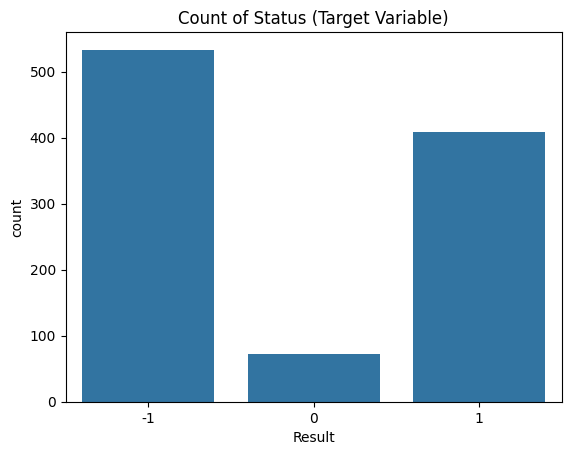

In [16]:


# Create a count plot for the target variable (status)

sns.countplot(x=y_train)

# Display the plot
plt.title('Count of Status (Target Variable)')
plt.show()


**Since this task is about anomally detection, we can expect the unbalanced data set liked this**

### Data Visualization

In [17]:
#how the featiure are affected to the traget values

# Step 1: Concatenate X_train and y_train
train_combined = pd.concat([X_train, y_train], axis=1)

**Distribution of Classes**

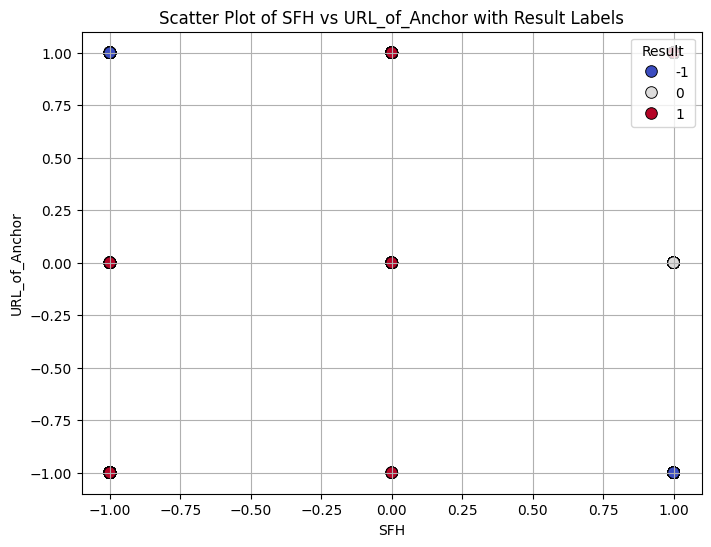

In [18]:
feature_x = 'SFH'
feature_y = 'URL_of_Anchor'

# Create a scatter plot with colors based on the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_combined, x=feature_x, y=feature_y, hue='Result', palette='coolwarm', s=70, edgecolor='k')

# Add plot title and labels
plt.title(f'Scatter Plot of {feature_x} vs {feature_y} with Result Labels')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Result', loc='upper right')
plt.grid(True)
plt.show()

**Visual for Correlation Heatmap:**

**Pair Plot for Detailed Patterns**

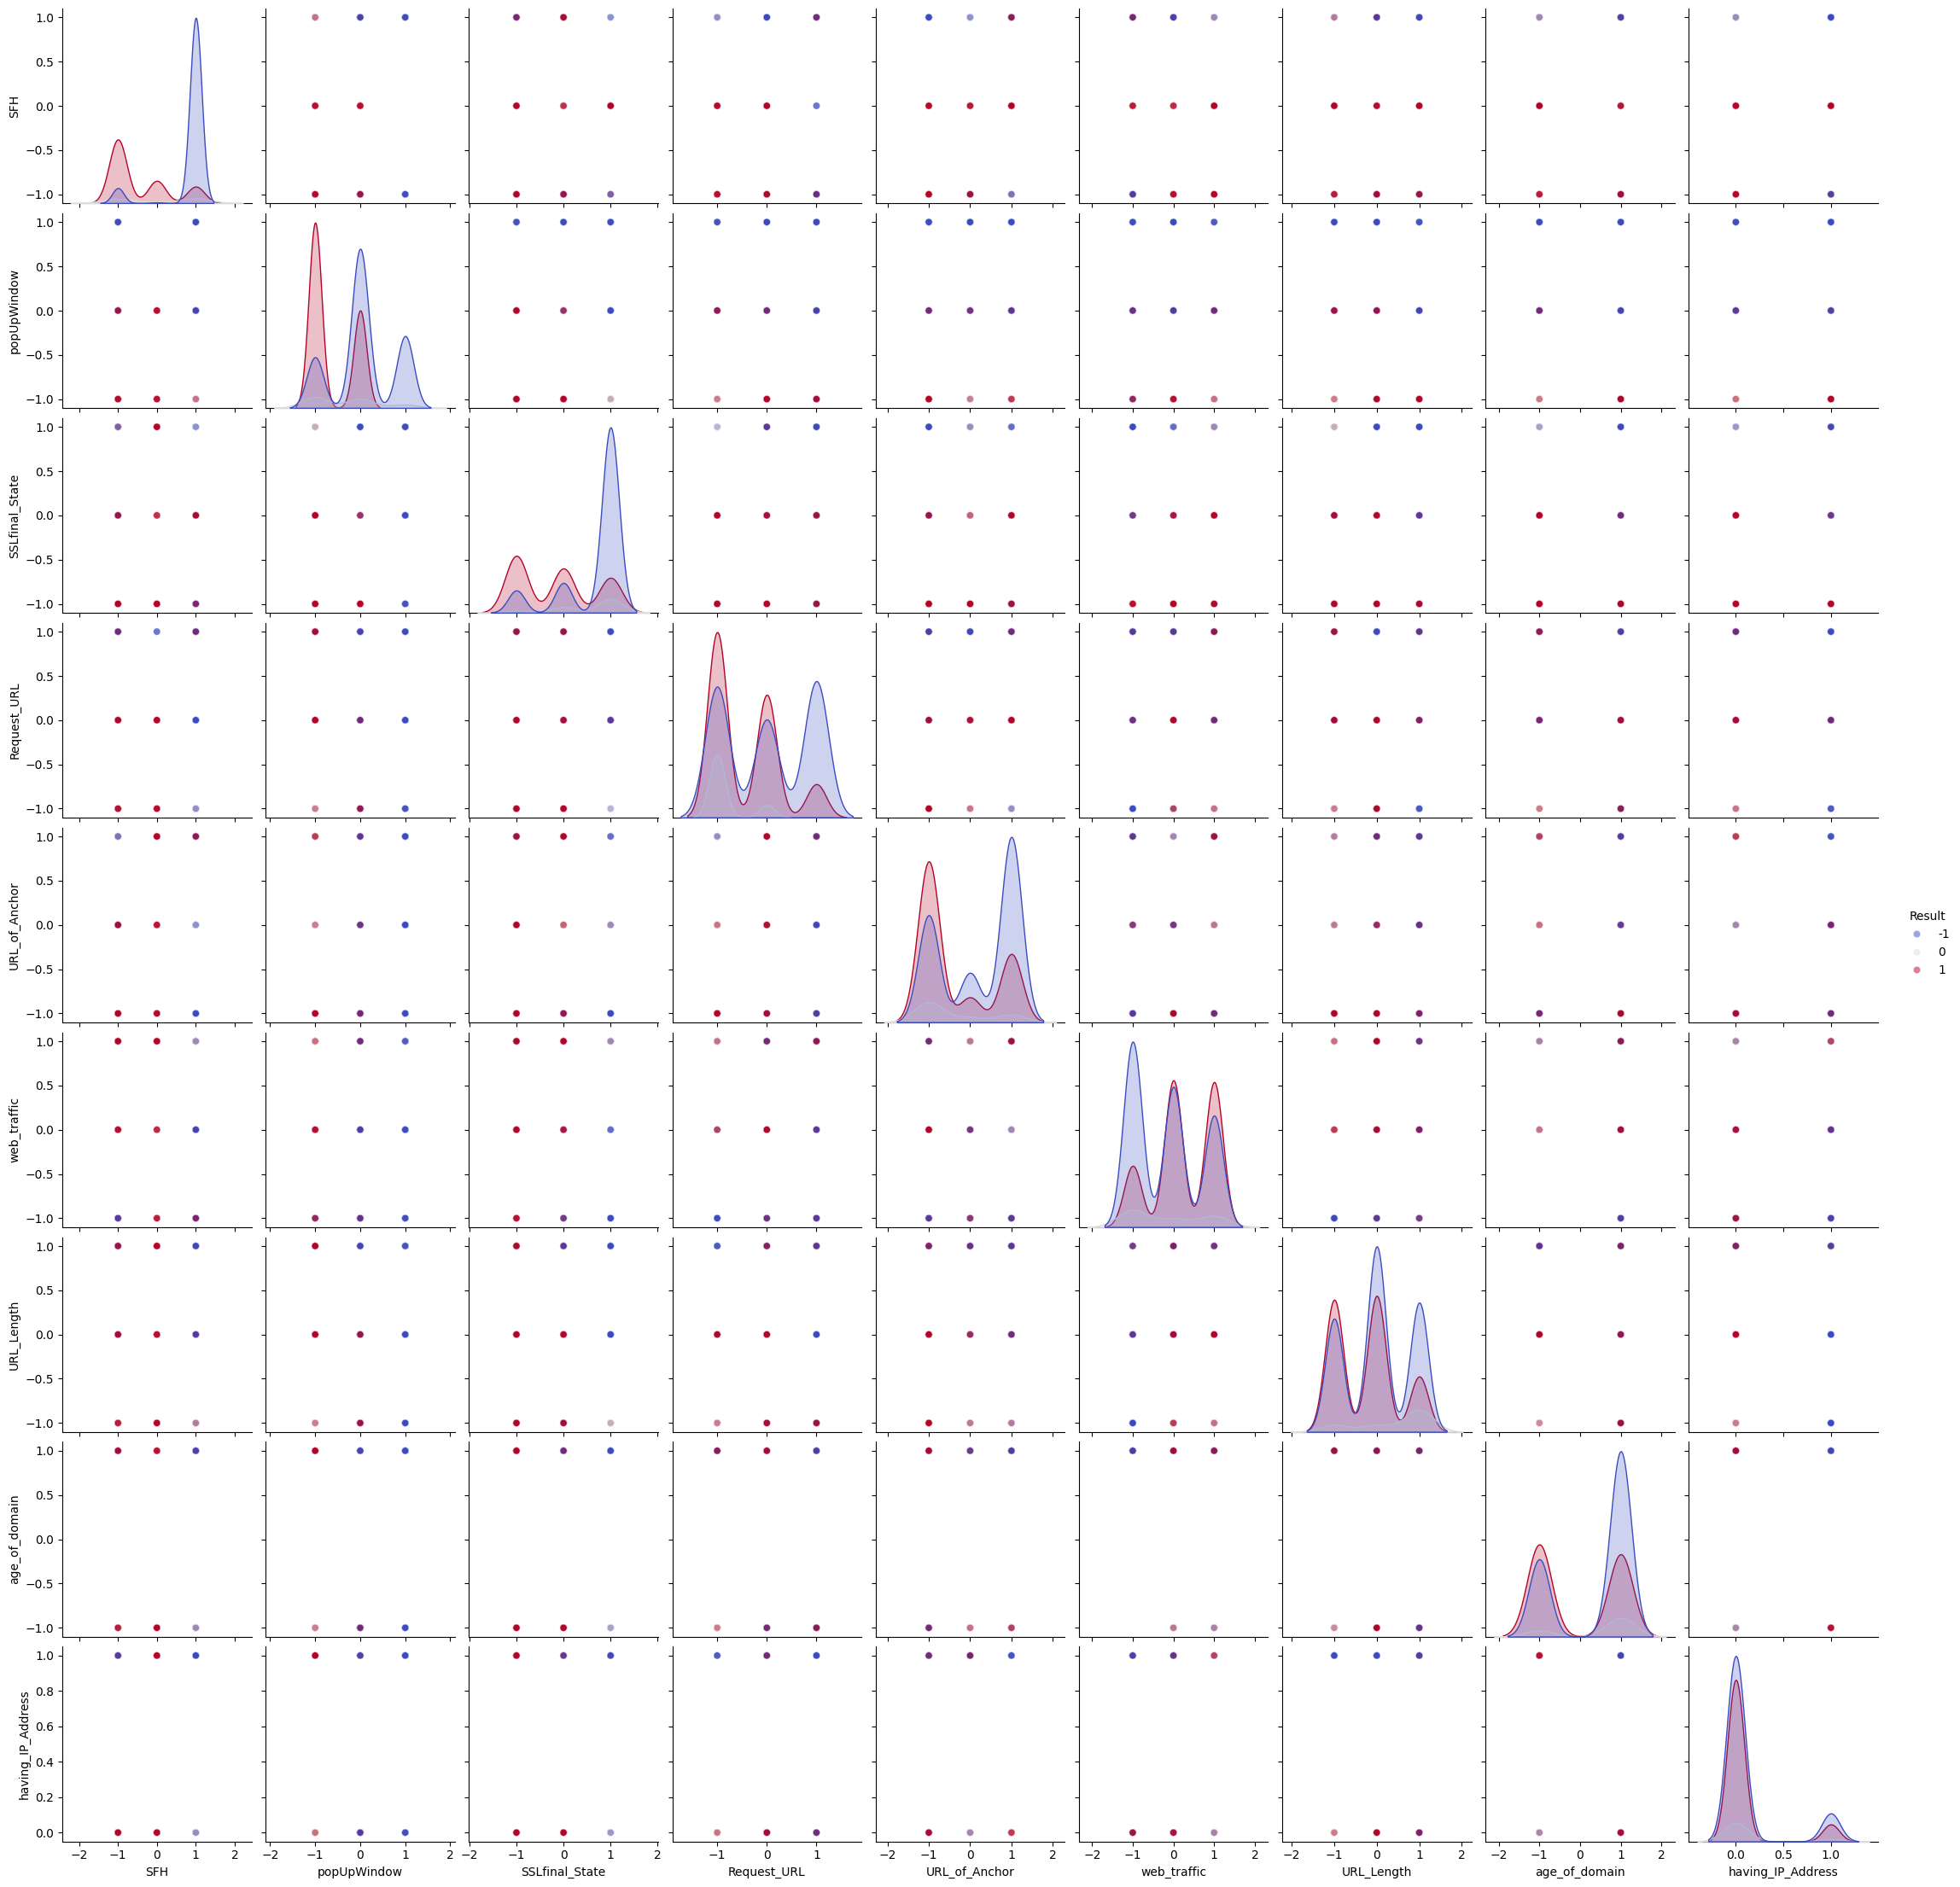

In [19]:
sns.pairplot(train_combined, hue='Result', palette='coolwarm', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

**Scatter Plots for Specific Feature Pairs**

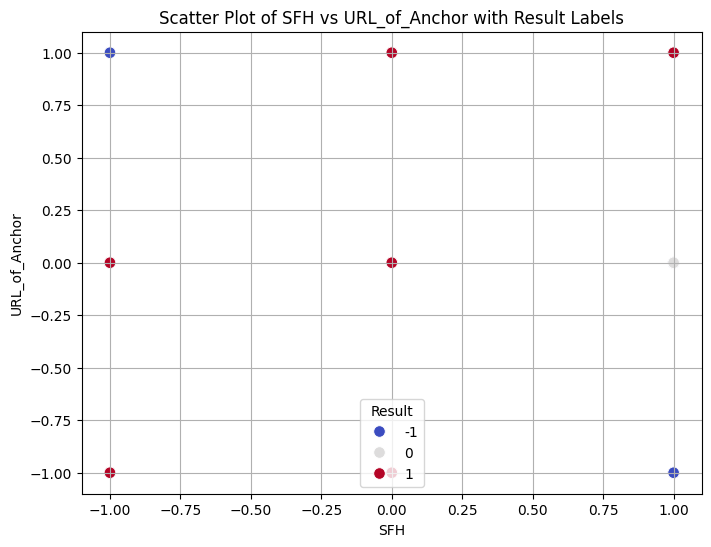

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_combined, x='SFH', y='URL_of_Anchor', hue='Result', palette='coolwarm', s=70)
plt.title("Scatter Plot of SFH vs URL_of_Anchor with Result Labels")
plt.xlabel('SFH')
plt.ylabel('URL_of_Anchor')
plt.grid(True)
plt.legend(title='Result')
plt.show()

# Data Preprocessing:

In [21]:
# Check for null values in the training set
null_values = pd.isnull(X_train).sum()

# Display the result
print(null_values)


SFH                  0
popUpWindow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
dtype: int64


In [22]:
null_values_test = pd.isnull(X_test).sum()

# Display the result
print(null_values_test)

SFH                  0
popUpWindow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
dtype: int64


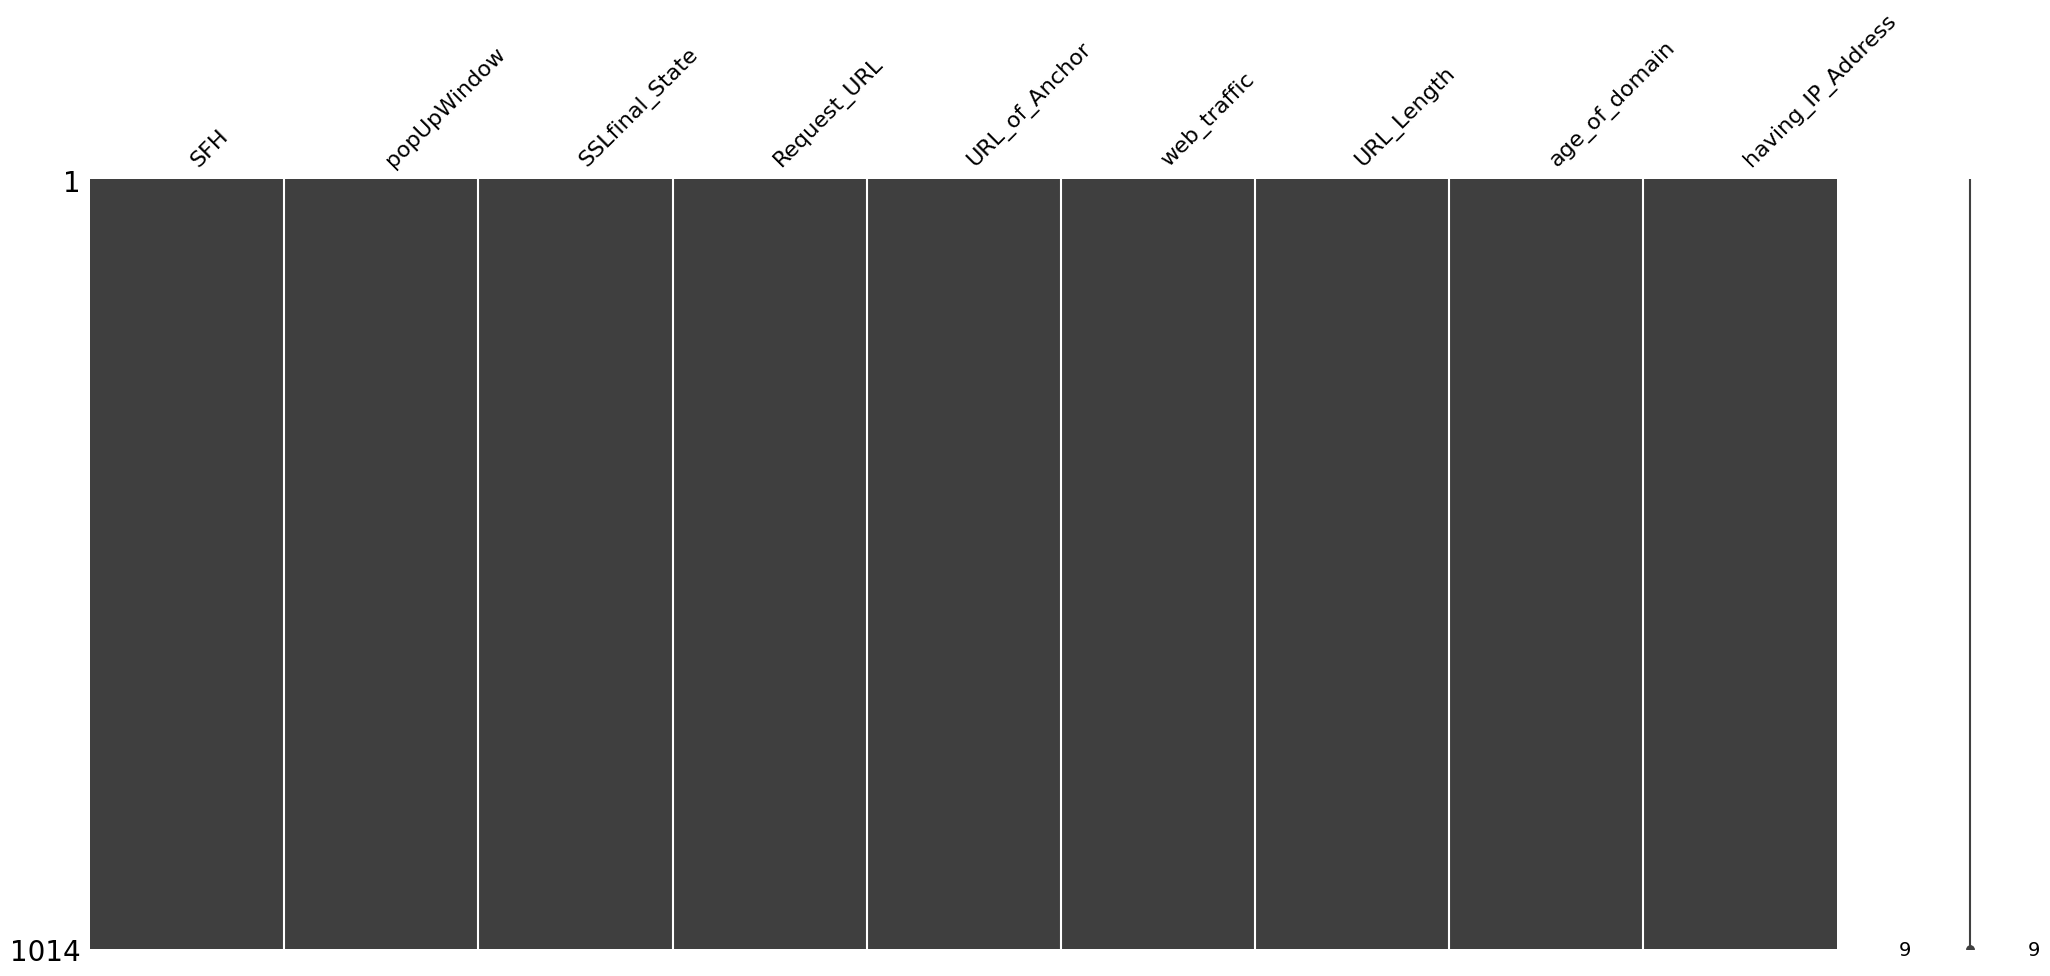

In [23]:
import missingno as msno

# Visualize the missing values in the training set
msno.matrix(X_train)

# Display the plot
plt.show()


So we do not have the null values in the data set

# Handling Categorical values

Since we know there are only numerical values, No need to do the categorical featues handling tecniques liked one hot endcording

# Hadling Outliers

<ipython-input-24-791497b41953>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


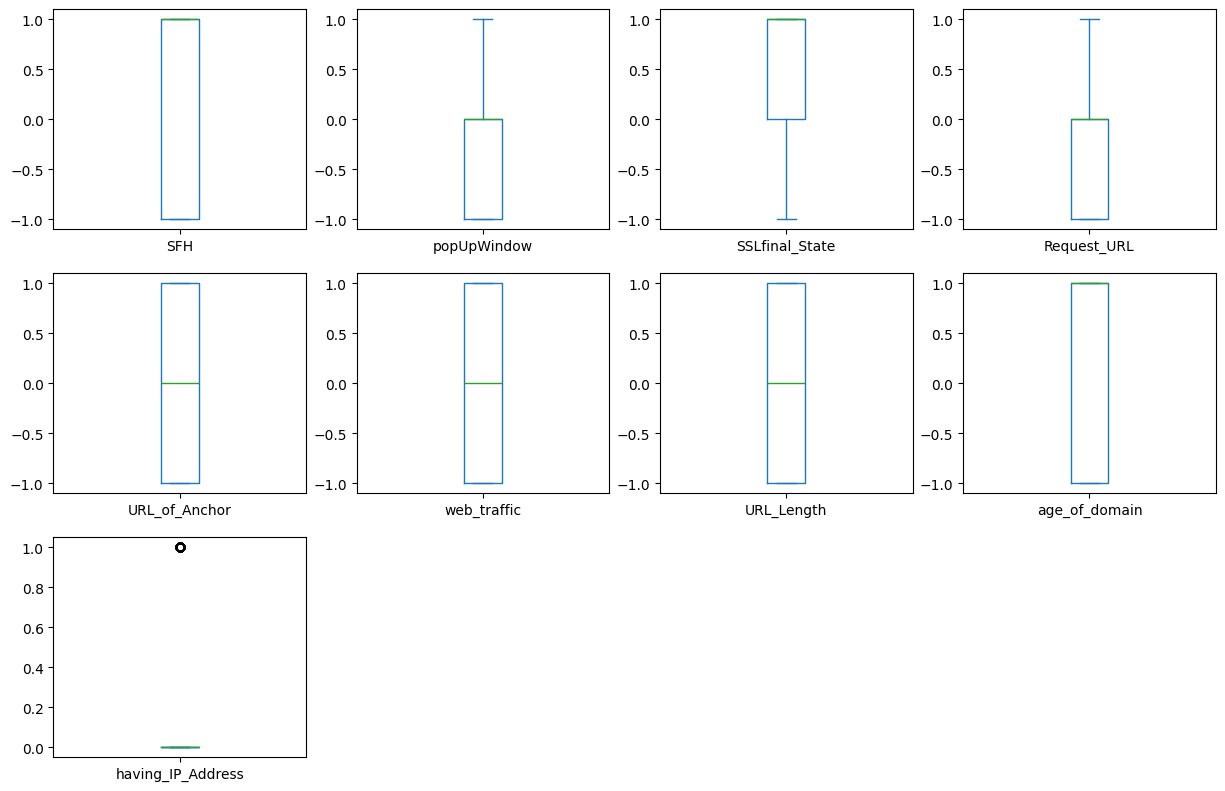

In [24]:

fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

In [25]:
# Counting outliers of Rotational speed column
# Calculate Q1, Q3, and IQR
Q1 = X_train["having_IP_Address"].quantile(0.25)
Q3 = X_train["having_IP_Address"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = df[(df["having_IP_Address"] < lower_bound) | (df["having_IP_Address"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers

155

<ipython-input-26-623c78a05d0a>:29: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)


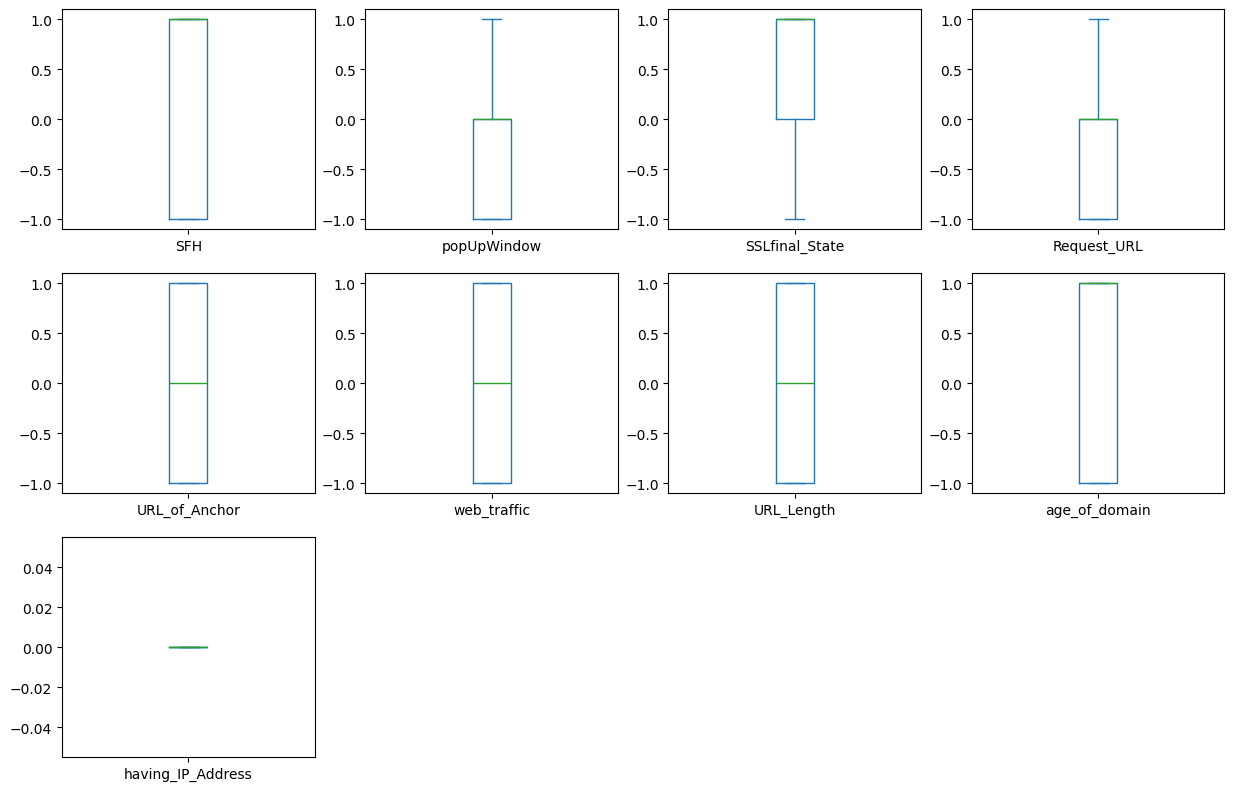

In [26]:
# Counting outliers of Rotational speed column
# Calculate Q1, Q3, and IQR
Q1 = X_train["having_IP_Address"].quantile(0.25)
Q3 = X_train["having_IP_Address"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Define outliers based on the bounds
outliers = X_train[(X_train["having_IP_Address"] < lower_bound) | (X_train["having_IP_Address"] > upper_bound)]

# Count the number of outliers
number_of_outliers = outliers.shape[0]

# Output the number of outliers
number_of_outliers


# Cap the values exceeding the upper bound
X_train.loc[X_train["having_IP_Address"] > upper_bound, "having_IP_Address"] = upper_bound

# Cap the values below the lower bound
X_train.loc[X_train["having_IP_Address"] < lower_bound, "having_IP_Address"] = lower_bound

fig = plt.figure(figsize = (15, 20))
ax = fig.gca()
X_train.plot(ax=ax, kind = 'box', subplots=True, layout=(6,4), sharex=False)
plt.show()

### Feature Selection

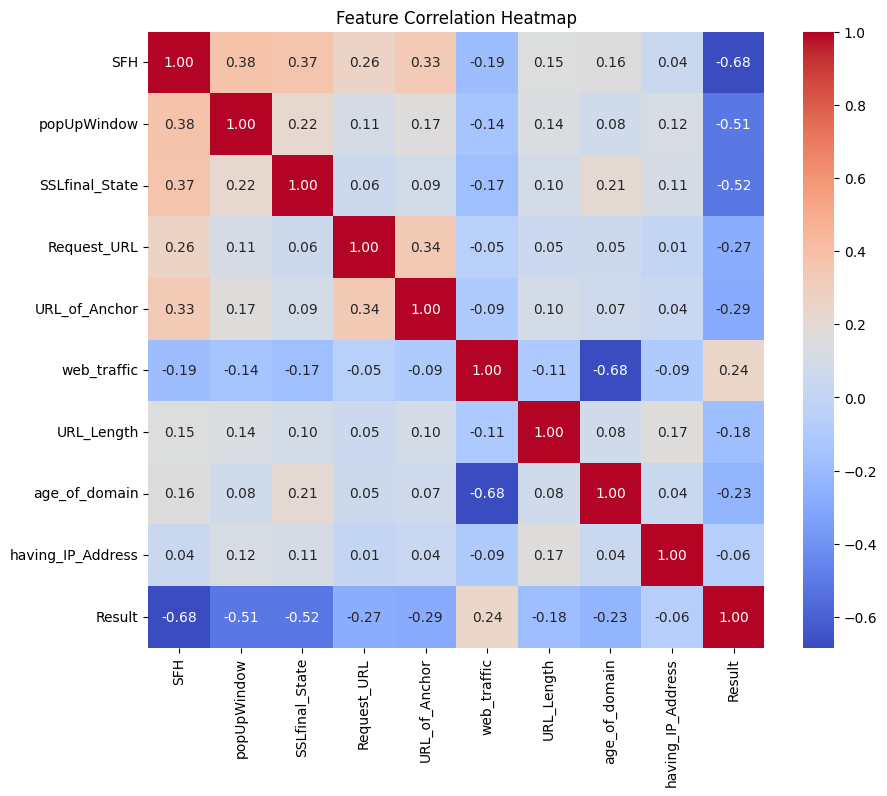

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
# Define a threshold for high correlation
correlation_threshold = 0.7  # You can adjust this threshold as needed

correlation_matrix = df.corr()

# Identify pairs of features with correlation higher than the threshold
to_drop = set()  # Use a set to avoid duplicates

# Iterate through the correlation matrix
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        # Skip the diagonal (correlation of a feature with itself)
        if col != row and abs(correlation_matrix.loc[row, col]) > correlation_threshold:
            # Mark the feature to drop
            to_drop.add(col)

# Remove the features with high correlation
X_train = X_train.drop(columns=to_drop)
X_train = X_train.drop(columns=to_drop)

# Print the features to drop and remaining selected features
print("Features dropped due to high correlation:")
print(to_drop)
print()  # New line added for readability

# Print the remaining features and their count
remaining_features = X_train.columns.tolist()
print("Remaining Features after removing highly correlated ones:")
print(remaining_features)
print(f"Number of remaining features: {len(remaining_features)}")


Features dropped due to high correlation:
set()

Remaining Features after removing highly correlated ones:
['SFH', 'popUpWindow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']
Number of remaining features: 9


We set the Threashohold as -0.7 and +0.7
so since there are no any correlations betwenen featueres

#Feature **Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training with Support Vector Machine (SVM):

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced']
}
#C - Regularization parameter
# rbf - Radial Basis Function(A Gaussian kernel)
# Initialize GridSearchCV with SVM and fit
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model
best_svm_model = grid_search.best_estimator_

# Make predictions with the best model on both train and test sets
y_train_pred_best = best_svm_model.predict(X_train_scaled)
y_test_pred_best = best_svm_model.predict(X_test_scaled)

# Evaluate the best model
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)
class_report_best = classification_report(y_test, y_test_pred_best)

# Print results for the best model
print("Best Model Hyperparameters:", grid_search.best_params_)
print("Training Accuracy after Hyperparameter Tuning:", train_accuracy_best)
print("Testing Accuracy after Hyperparameter Tuning:", test_accuracy_best)
print("\nConfusion Matrix (Best Model):\n", conf_matrix_best)
print("\nClassification Report (Best Model):\n", class_report_best)



Best Model Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Training Accuracy after Hyperparameter Tuning: 0.9516765285996055
Testing Accuracy after Hyperparameter Tuning: 0.8997050147492626

Confusion Matrix (Best Model):
 [[152   3  14]
 [  2  25   4]
 [  9   2 128]]

Classification Report (Best Model):
               precision    recall  f1-score   support

          -1       0.93      0.90      0.92       169
           0       0.83      0.81      0.82        31
           1       0.88      0.92      0.90       139

    accuracy                           0.90       339
   macro avg       0.88      0.88      0.88       339
weighted avg       0.90      0.90      0.90       339



In [31]:
# Plotting the confusion matrix for better visualization

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Phishing','Suspicious','Legitimate'], yticklabels=['Phishing','Suspicious','Legitimate'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()




NameError: name 'conf_matrix' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model with the best hyperparameters from GridSearchCV
best_svm_model = SVC(kernel='rbf', C=grid_search.best_params_['C'], class_weight='balanced', random_state=42)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Cross-validation score')

# Add a shaded region to indicate variability
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='orange')

# Add labels, title, and legend
plt.title('Learning Curve for SVM Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# **Model Traning With Random Forest **

# **Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 30, 50],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize GridSearchCV with Random Forest and fit
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results for the best model
print("Best Model Hyperparameters:", grid_search.best_params_)
print("Improved Accuracy after Hyperparameter Tuning:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Initial model without hyperparameter tuning
initial_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
initial_rf_model.fit(X_train_scaled, y_train)
initial_y_pred = initial_rf_model.predict(X_test_scaled)

# Initial model evaluation
initial_accuracy = accuracy_score(y_test, initial_y_pred)
initial_conf_matrix = confusion_matrix(y_test, initial_y_pred)
initial_class_report = classification_report(y_test, initial_y_pred)

# Print results for the initial model
print("Accuracy Before Hyperparameter Tuning:", initial_accuracy)
print("\nConfusion Matrix (Initial Model):\n", initial_conf_matrix)
print("\nClassification Report (Initial Model):\n", initial_class_report)


In [ ]:
# Plotting the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    best_rf_model,  # Use the best SVM model from GridSearchCV
    X_train_scaled,  # Use the scaled training data
    y_train,         # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Vary the training sizes
    cv=5,            # Use 5-fold cross-validation
    scoring='accuracy'  # Metric to evaluate
)

# Calculate the mean and standard deviation of the training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of the validation scores
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation score')

# Plot the std deviation as shaded areas
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color='blue')
plt.fill_between(train_sizes,
                 validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std,
                 alpha=0.1, color='green')

# Adding labels and title
plt.title('Learning Curves for Best Random forest Model')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.ylim(0, 1)  # Set y-axis limit for clarity
plt.show()

# CONCLUSION

Here, we used SVM and Random Forest as the algorithms.
For SVM, we achieved an accuracy of 0.95 on the training set and 0.89 on the testing set.
For Random Forest, the accuracy was 0.91 on the training set and 0.90 on the testing set.

However, when considering training time, SVM took only 4 seconds to train the model, while Random Forest required 9 minutes. This increased training time for Random Forest is expected, as it generally takes longer due to its complexity.

Even though Random Forest requires significantly more time, it is the most generalized model for unseen data.